In [1]:
1+2

3

<h1> <a href='http://interactivepython.org/runestone/static/pythonds/AlgorithmAnalysis/toctree.html'> Chapter 2:  Algorithm Analysis  </a> </h1>

Objectives
* To understand why algorithm analysis is important.
* To understand the “Big-O” execution time of common operations on Python lists and dictionaries.
* To understand how the implementation of Python data impacts algorithm analysis.
* To understand how to benchmark simple Python programs.

When two programs solve the same problem but look different, is one program better than the other?

In [2]:
#list1
import time

def sumOfN2(n):
   start = time.time()

   theSum = 0
   for i in range(1,n+1):  # O(N)
      theSum = theSum + i   # How many number of steps
   end = time.time()

   return theSum,end-start

def sumOfN3(n):          # O(1)
    start = time.time()
    theSum = (n*(n+1))/2
    end = time.time()
    return theSum,end-start

m=1000000              # Problem size
print("%15s%15s%15s"  % ("N", "sumOfN2 - O(N)", "sumOfN3 - O(1)" )  ) 
L = list (range (m,11*m, m))
B=[]; C=[];
for n in L:
    x, tx = sumOfN2(n)  #O(N)
    y, ty = sumOfN3(n)  # O(1)
    B.append (tx)
    C.append (ty)
    print("%15d%15.7f%15.7f" % (n, tx,ty) )

              N sumOfN2 - O(N) sumOfN3 - O(1)
        1000000      0.0955751      0.0000012
        2000000      0.1958749      0.0000021
        3000000      0.2394109      0.0000021
        4000000      0.3427520      0.0000021
        5000000      0.4213557      0.0000012
        6000000      0.5433609      0.0000021
        7000000      0.6393840      0.0000019
        8000000      0.7707350      0.0000021
        9000000      0.8628609      0.0000010
       10000000      0.8665118      0.0000007


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16,9))

plt.plot(L, B, label="sumOfN2: O(N)")
plt.plot(L, C, label='sumOfN3: O(1)  ' )


plt.legend(loc="upper center", fontsize="xx-large")
plt.show()

KeyboardInterrupt: 

In [ ]:
# listing #2
#T(n)=3+3n^2+2n+1=3n^2+2n+4.

def foo(n):
    a = 5
    b = 6
    c = 10

    for i in range(n):
        for j in range(n):
            x = i * i
            y = j * j
            z = i * j

    for k in range(n):
        w = a * k + 45
        v = b * b

d = 33


Measure the time complexity by the number of assignment operations, as listed below.
* T(n)=3+3$n^{2}$+2n+1=3$n^{2}$+2n+4. 
* By looking at the exponents, we can easily see that the $n^{2}$term will be dominant and therefore this fragment of code is O($n^{2}$). 
* Note that all of the other terms as well as the coefficient on the dominant term can be ignored as n grows larger.

<div class="image123">
    <div style="float:left;margin-right:55px;">
    <figure>
        <img src="images/T_of_n.png" height="600" width="600"  />
        <figcaption style="text-align:center;"> Compare T(n) with some common Big-O functions </figcaption>
    </figure>
    </div>
 
</div>

### The computer scientist definition of "fast algorithm"

An algorithm is "fast" if its worst-case running time grows slowly with the input size.

Three principles of this kind of algorithm analysis:
* Worst-case behavior is most important
* Don't sweat small constant factors -- big picture analysis
* Asymptotic analysis -- how does behavior change as input size grows?

Seven functions that often appear in algorithm analysis:
* Constant ≈ $1$
* Logarithmic ≈ $\log n$
* Linear ≈ $n$
* N-Log-N ≈ $n \log n$
* Quadratic ≈ $n^{2}$
* Cubic ≈ $n^{3}$
* Exponential ≈ $2^{n}$

Let's look at their growth rates using matplotlib!


* The order of magnitude function describes the part of T(n) that increases the fastest as the value of n increases. 
* Order of magnitude is often called Big-O notation (for “order”) and written as O(f(n)). 
* It provides a useful approximation to the actual number of steps in the computation. 
* The function f(n) provides a simple representation of the dominant part of the original T(n).

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from math import log
plt.style.use('seaborn-whitegrid') # presentation

plt.figure(figsize=(16,9))
import numpy as np
x = np.linspace(1, 20, 50)

# First plot a constant function
plt.plot(x, np.ones(50), label="f(n) = 1")

# Then plot log(x)
plt.plot(x, np.log(x), label='f(n)= log(n)')

# Then plot linear growth
plt.plot(x, x, label='f(n)=n')

# Now add n log n growth
plt.plot(x, np.multiply(x, np.log(x)), label="f(n) = n*log(n)")

plt.legend(loc="upper center", fontsize="xx-large")
plt.show()

<h3> <a href='http://interactivepython.org/runestone/static/pythonds/AlgorithmAnalysis/AnAnagramDetectionExample.html    '> 2.4. An Anagram Detection Example  </a> </h3>

One string is an anagram of another if the second is simply a rearrangement of the first. For example, 
* 'heart' and 'earth'  
* 'python' and 'typhon'

Given two strings s1 and s2 with equal length
* anagramSolution1: Check if each character in s1 actually occurs in s2. O(n^2)
* anagramSolution2: Compare the sorted strings of s1 and s2               O(n log n)
* anagramSolution3: Enumerate all permutation s of s1, and see if any s == s2
* anagramSolution4: count and compare                                     O(n)

In [17]:
x = [1,2]
y = [1,2,3]
x.append (3)
assert x == y
print (x)
print (y)

[1, 2, 3]
[1, 2, 3]


In [ ]:
import itertools
from timeit import Timer
import random
import string

# Assume len(s1)==len(s2)
def anagramSolution1(s1,s2):  # O(N^2)
    alist = list(s2)          # string s2 is immutable, alist is mutable

    pos1 = 0
    stillOK = True

    #    python  ==> python ==> python  ==> python  ==> python
    #    ^            ^           ^            ^            ^
    #    typhon ==> ty@hon  ==> @@@hon ==> @@@hon  ==> @@@@on
    #    --^        -^         ^           ---^        ----^
    
    #    pyyhon  ==> pyyhon ==> pyyhon  
    #    ^            ^           ^            ^
    #    typhon ==> ty@hon  ==> @@@hon 
    #    --^        -^          ------ fail           

    while pos1 < len(s1) and stillOK:    # for each position in string s1 O(N)
        pos2 = 0
        found = False
        while pos2 < len(alist) and not found:  # check if the current char exists on alist O(N)
            if s1[pos1] == alist[pos2]:
                found = True
            else:
                pos2 = pos2 + 1                 # if not found, move to next position

        if found:
            alist[pos2] = None                  # mark off
        else:
            stillOK = False

        pos1 = pos1 + 1

    return stillOK



def anagramSolution2(s1,s2): # O(n log n)
    """
    If s1 and s2 are sorted first, then they are anagram if s1==s2 

    @param param1: the 1st string
    @param param2: second string
    @return: true if s1 and s2 are anagram
    @raise keyError: raises an exception
    """
    alist1 = list(s1)   # convert string s1 to list   alist1
    alist2 = list(s2)    # convert string s2 to list   alist2

    alist1.sort()       # sort() has time complexity O(n log n)
    alist2.sort()       # sort() has time complexity O(n log n)
    #return alist1 == alist2
    
    
    pos = 0
    matches = True

    while pos < len(s1) and matches:
        if alist1[pos]==alist2[pos]:
            pos = pos + 1
        else:
            matches = False
    return matches

def anagramSolution3(s1,s2): # O(n!) >  O(2^n)
  for s3 in itertools.permutations(s1):
    if "".join(s3)==s2:
      return True
  return theSum

def anagramSolution4(s1,s2):  # O(n)
    """
      count and compare
                  0 1 2 3 4 5 6  7
      heart  ==>  a b c d e f g  h ...         z
            c1= [ 0 0 0 0 1 0 0  1                            ] # number of occurences for each letter in s1
                     c1[7]  += 1
                     c1[4]  += 1
    
      eaarth
                  0 1 2 3 4 5 6  7
             ==>  a b c d e f g  h ...         z
            c2 = [2 0 0 0 1 0 0  1                          ] # number of occurences for each letter in s2
                     c2[4]  += 1 
                     c2[0]  += 1 
                     c2[0]  += 1 
                    
    """
    c1 = [0]*26

    n = len(s1)
    x = ord('a')
    for i in range( n ):
        pos = ord(s1[i])-x  # get the pos index for each letter in string s1
        c1[pos] += 1
        pos = ord(s2[i])-x  # get the pos index for each letter in string s2
        c1[pos] -=  1

    for i in c1:
        if i != 0:
            return False

    return True

def demo():
  x,y = randomword (5)
  L = ( (x,y), ('abcd','dcba'), ('abcde','edcba'), ('abcde','edcba'), ('apple','pleap'), ('python', 'typhon'))
  for z in L:
    x = z[0]; y = z[1];
    assert (anagramSolution1(x,y))
    assert (anagramSolution2(x,y))
    assert (anagramSolution3(x,y))
    assert (anagramSolution4(x,y))



def randomword(length):
    allchar = string.ascii_lowercase 

    L = [random.choice(allchar) for i in range(length) ]
    random.shuffle(L)
    x = ''.join(L)
    random.shuffle(L)
    y = ''.join(L)
    return x,y

demo()  

if True: 
    x,y = randomword (1000000)
    #print (x,y)
    
    M=1
    print ("start")
    #t1 = Timer("anagramSolution1(x,y)", "from __main__ import anagramSolution1, x, y ")
    #print("anagramSolution1 ", t1.timeit(number=M), "milliseconds")
    
    t2 = Timer("anagramSolution2(x,y)", "from __main__ import anagramSolution2, x, y ")
    print("anagramSolution2 ", t2.timeit(number=M), "milliseconds")
    #t3 = Timer("anagramSolution3(x,y)", "from __main__ import anagramSolution3, x,y ")
    # print("anagramSolution3 ", t3.timeit(number=M), "milliseconds")
    t4 = Timer("anagramSolution4(x,y)", "from __main__ import anagramSolution4, x,y ")
    print("anagramSolution4 ", t4.timeit(number=M), "milliseconds")

#main()



<h3> <a href='http://interactivepython.org/runestone/static/pythonds/AlgorithmAnalysis/PerformanceofPythonDataStructures.html'> 2.5. Performance of Python Data Structures: lists  </a> </h3>


<h3> <a href='http://interactivepython.org/runestone/static/pythonds/AlgorithmAnalysis/Lists.html'> 2.5.  lists  </a> </h3>
Four different ways to generate a list of n numbers starting with 0.

In [7]:
# listing 3
from timeit import Timer


def test1():
    l = []
    for i in range(1000):
        l = l + [i]

def test2():
    l = []
    for i in range(1000):
        l.append(i)

def test3():  # 
    l = [i for i in range(1000)]  #comprehension

def test4():
    l = list(range(1000))


t1 = Timer("test1()", "from __main__ import test1")
print("concat ",t1.timeit(number=1000), "milliseconds")
t2 = Timer("test2()", "from __main__ import test2")
print("append ",t2.timeit(number=1000), "milliseconds")
t3 = Timer("test3()", "from __main__ import test3")
print("comprehension ",t3.timeit(number=1000), "milliseconds")
t4 = Timer("test4()", "from __main__ import test4")
print("list range ",t4.timeit(number=1000), "milliseconds")

#concat  6.54352807999 milliseconds
#append  0.306292057037 milliseconds
#comprehension  0.147661924362 milliseconds
#list range  0.0655000209808 milliseconds

concat  1.6355756449999959 milliseconds
append  0.11819102900000189 milliseconds
comprehension  0.056083370999999715 milliseconds
list range  0.024697950000003743 milliseconds


In [10]:
#listing 4
#from timeit import Timer
import timeit

popzero = timeit.Timer("x.pop(0)",
                       "from __main__ import x")
popend = timeit.Timer("x.pop()",
                      "from __main__ import x")

x = list(range(2000000))      # x = [0,1,2, ...,  2000000-1=1999999  ]
t1 = popzero.timeit(number=1000)
#4.8213560581207275
print ("popzero :", t1)

x = list(range(2000000))
t2 = popend.timeit(number=1000)    # popend for pop() at the end
#0.0003161430358886719
print ("popend = :", t2)


popzero : 2.1539358450000066
popend = : 0.00015390499999057283


In [11]:
"""
#listing 5
While our previous test does show that pop(0) is indeed slower than pop(), 
it does not validate the claim that pop(0) is O(n) while pop() is O(1). 

To validate that claim we need to look at the performance of both calls 
over a range of list sizes. 

Listing 5 implements this test.
"""

from timeit import Timer

popFront = Timer("x.pop(0)", "from __main__ import x")
popRear = Timer("x.pop()", "from __main__ import x")
print("%11s %15s %15s" % ("list size", "pop(0)", "pop()") )

delta = 1000000
samples = 100
A = list ( range(delta,delta*10+1,delta) ) # A = [ 1000000, 2000000, 3000000, ...,10,000,000 ]
B = []
C = []
for i in A :  # for each number in list A = [ 1000000, 2000000, 3000000, ...,10,000,000 ]
    x = list(range(i))
    timePopFront = popFront.timeit(number=samples) # run tiem for opertaion pop(0)
    B.append(timePopFront)                         # B = [ runtime for 1,000,000, time for 2,000,000, ... ]
    x = list(range(i))
    
    timePopRear = popRear.timeit(number=samples)   # run tiem for opertaion pop() at the end, O(1)
    C.append ( timePopRear )                       # C = [ time for 1,000,000, time for 2,000,000 ...]
    print("%10d: %15.5f %15.5f" %(i, timePopFront,timePopRear))



  list size          pop(0)           pop()
   1000000:         0.15885         0.00001
   2000000:         0.20593         0.00001
   3000000:         0.37810         0.00001
   4000000:         0.45246         0.00002
   5000000:         0.51770         0.00005
   6000000:         0.58028         0.00001
   7000000:         0.75837         0.00001
   8000000:         0.79648         0.00001
   9000000:         0.89927         0.00002
  10000000:         0.96674         0.00001


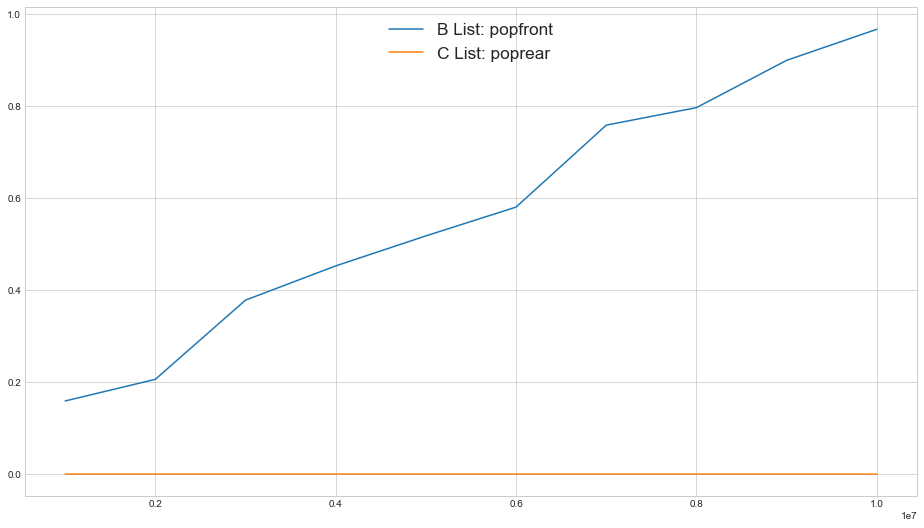

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16,9))

plt.plot(A, B, label="B List: popfront")
plt.plot(A, C, label='C List: poprear')


plt.legend(loc="upper center", fontsize="xx-large")
plt.show()

In [ ]:
Repeat the above experiment for anagramSolution 1,2 and 4.